<a href="https://colab.research.google.com/github/songhyun7597/ITB2022/blob/main/%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_%EA%B2%BD%EC%98%81%ED%95%99%EB%B6%80_2015519_%EC%9D%B4%EC%86%A1%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 불러오기 및 전처리(결측치 및 이상치제거)

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=0177ed72fcaa5e4adc9af8260c2492137ee7377abaa482e0b1ae840732b4ef0a
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 4.1 MB/s 
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0


In [3]:
import mglearn

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt

In [9]:
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IT와비즈니스혁신/data/health_data.csv", encoding='utf-8')


In [10]:
print(health.columns)

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')


In [7]:
!sudo apt-get install -y fonts-nanum !sudo fc-cache -fv !rm ~/.cache/matplotlib -rf

apt 1.6.14 (amd64)
Supported modules:
 Ver: Standard .deb
 Pkg:  Debian dpkg interface (Priority 30)
 Pkg:  Debian APT solver interface (Priority -1000)
 Pkg:  Debian APT planner interface (Priority -1000)
 S.L: 'deb' Debian binary tree
 S.L: 'deb-src' Debian source tree
 Idx: Debian Source Index
 Idx: Debian Package Index
 Idx: Debian Translation Index
 Idx: Debian dpkg status file
 Idx: Debian deb file
 Idx: Debian dsc file
 Idx: Debian control file
 Idx: EDSP scenario file
 Idx: EIPP scenario file
E: Command line option 'r' [from -rf] is not understood in combination with the other options.


In [11]:
plt.rcParams['font.family'] = 'NanumGothic'

In [12]:
print(health.isnull().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [13]:
health=health.dropna(axis = 0)

In [14]:
health.isnull().sum()

기준년도           0
가입자일련번호        0
시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
데이터공개일자        0
dtype: int64

In [15]:
health.duplicated()

6       False
16      False
21      False
27      False
47      False
        ...  
9954    False
9963    False
9965    False
9967    False
9974    False
Length: 1249, dtype: bool

In [16]:
health = health.drop_duplicates()

In [17]:
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021


In [18]:
health['성별코드'] = health['성별코드'].map({'F':0, 'M':1})

In [19]:
health['흡연상태'] = health['흡연상태'].map({'Yes':1, 'No':0})

In [20]:
health['음주여부'] = health['음주여부'].map({'Yes':1, 'No':0})

In [21]:
health=health.drop(['데이터공개일자'], axis=1)

In [22]:
health=health.drop(['기준년도',	'가입자일련번호',	'시도코드'], axis=1)

In [23]:
health=health.drop(['시력(좌)',	'시력(우)'], axis=1)

In [24]:
health.isnull().sum()

성별코드             0
연령대코드(5세단위)      0
신장(5Cm단위)        0
체중(5Kg 단위)       0
허리둘레             0
청력(좌)            0
청력(우)            0
수축기혈압            0
이완기혈압            0
식전혈당(공복혈당)       0
총콜레스테롤           0
트리글리세라이드         0
HDL콜레스테롤         0
LDL콜레스테롤         0
혈색소              0
요단백              0
혈청크레아티닌          0
(혈청지오티)AST       0
(혈청지오티)ALT       0
감마지티피            0
흡연상태           286
음주여부             0
구강검진수검여부         0
치아우식증유무          0
치석               0
dtype: int64

In [25]:
health=health.dropna(axis = 0)

In [26]:
q1=health['수축기혈압'].quantile(0.25)
q3=health['수축기혈압'].quantile(0.75)
iqr=q3-q1

condition=health['수축기혈압']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [27]:
health.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.0,960.000000,960.000000
mean,0.427083,11.569792,160.197917,61.973958,81.453021,1.060417,1.053125,121.942708,75.716667,103.044792,...,1.090625,0.851875,26.725000,26.056250,33.386458,0.231250,0.600000,1.0,0.161458,0.589583
std,0.494912,2.156380,9.007724,12.512115,9.863995,0.238381,0.224400,14.293069,9.638131,24.168229,...,0.453368,0.377325,14.714361,24.572316,35.373261,0.421852,0.490153,0.0,0.368145,0.581516
min,0.000000,9.000000,130.000000,30.000000,57.000000,1.000000,1.000000,80.000000,50.000000,61.000000,...,1.000000,0.400000,10.000000,2.000000,3.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,9.000000,155.000000,55.000000,74.000000,1.000000,1.000000,111.000000,70.000000,90.000000,...,1.000000,0.700000,20.000000,15.000000,16.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,11.000000,160.000000,60.000000,81.900000,1.000000,1.000000,121.000000,76.000000,97.000000,...,1.000000,0.800000,24.000000,20.000000,23.000000,0.000000,1.000000,1.0,0.000000,1.000000
75%,1.000000,13.000000,165.000000,70.000000,88.000000,1.000000,1.000000,132.000000,82.000000,108.000000,...,1.000000,1.000000,29.000000,29.000000,36.000000,0.000000,1.000000,1.0,0.000000,1.000000
max,1.000000,18.000000,190.000000,120.000000,121.200000,2.000000,2.000000,162.000000,130.000000,314.000000,...,6.000000,8.700000,265.000000,477.000000,445.000000,1.000000,1.000000,1.0,1.000000,2.000000


In [28]:
q1=health['이완기혈압'].quantile(0.25)
q3=health['이완기혈압'].quantile(0.75)
iqr=q3-q1

condition=health['이완기혈압']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [29]:
q1=health['식전혈당(공복혈당)'].quantile(0.25)
q3=health['식전혈당(공복혈당)'].quantile(0.75)
iqr=q3-q1

condition=health['식전혈당(공복혈당)']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [30]:
q1=health['총콜레스테롤'].quantile(0.25)
q3=health['총콜레스테롤'].quantile(0.75)
iqr=q3-q1

condition=health['총콜레스테롤']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [31]:
q1=health['트리글리세라이드'].quantile(0.25)
q3=health['트리글리세라이드'].quantile(0.75)
iqr=q3-q1

condition=health['트리글리세라이드']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [32]:
q1=health['HDL콜레스테롤'].quantile(0.25)
q3=health['HDL콜레스테롤'].quantile(0.75)
iqr=q3-q1

condition=health['HDL콜레스테롤']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [33]:
q1=health['트리글리세라이드'].quantile(0.25)
q3=health['트리글리세라이드'].quantile(0.75)
iqr=q3-q1

condition=health['트리글리세라이드']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [34]:
q1=health['LDL콜레스테롤'].quantile(0.25)
q3=health['LDL콜레스테롤'].quantile(0.75)
iqr=q3-q1

condition=health['LDL콜레스테롤']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [35]:
q1=health['혈색소'].quantile(0.25)
q3=health['혈색소'].quantile(0.75)
iqr=q3-q1

condition=health['혈색소']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [36]:
q1=health['요단백'].quantile(0.25)
q3=health['요단백'].quantile(0.75)
iqr=q3-q1

condition=health['요단백']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [37]:
q1=health['혈청크레아티닌'].quantile(0.25)
q3=health['혈청크레아티닌'].quantile(0.75)
iqr=q3-q1

condition=health['혈청크레아티닌']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [38]:
q1=health['(혈청지오티)AST'].quantile(0.25)
q3=health['(혈청지오티)AST'].quantile(0.75)
iqr=q3-q1

condition=health['(혈청지오티)AST']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [39]:
q1=health['(혈청지오티)ALT'].quantile(0.25)
q3=health['(혈청지오티)ALT'].quantile(0.75)
iqr=q3-q1

condition=health['(혈청지오티)ALT']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [40]:
q1=health['감마지티피'].quantile(0.25)
q3=health['감마지티피'].quantile(0.75)
iqr=q3-q1

condition=health['감마지티피']>q3+1.5*iqr
a=health[condition].index
health.drop(a,inplace=True)

In [ ]:
health

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
21,0,11,155,50,65.9,1,1,114.0,73.0,94.0,...,1.0,0.8,24.0,14.0,12.0,0.0,0,1,0.0,0.0
47,1,16,165,65,94.0,2,2,110.0,72.0,114.0,...,1.0,1.0,28.0,20.0,43.0,0.0,1,1,0.0,0.0
59,0,12,150,55,89.0,1,1,113.0,70.0,107.0,...,1.0,0.9,24.0,37.0,40.0,0.0,1,1,0.0,2.0
83,1,10,170,70,85.9,1,1,108.0,73.0,89.0,...,1.0,0.9,21.0,22.0,35.0,0.0,1,1,0.0,1.0
84,1,11,170,75,88.0,1,1,140.0,80.0,93.0,...,1.0,1.1,20.0,22.0,23.0,1.0,1,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,0,15,150,55,79.0,1,1,108.0,60.0,93.0,...,1.0,0.9,25.0,14.0,16.0,0.0,0,1,0.0,0.0
9950,0,14,160,50,85.0,1,1,140.0,90.0,97.0,...,1.0,0.7,19.0,13.0,13.0,0.0,0,1,0.0,1.0
9954,1,9,180,70,87.5,1,1,108.0,70.0,98.0,...,1.0,0.9,22.0,21.0,19.0,0.0,1,1,0.0,1.0
9963,0,13,160,75,107.4,1,1,124.0,80.0,98.0,...,1.0,0.8,20.0,15.0,14.0,0.0,1,1,1.0,1.0


In [41]:
health = health.astype({'흡연상태':'int'})
health

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
21,0,11,155,50,65.9,1,1,114.0,73.0,94.0,...,1.0,0.8,24.0,14.0,12.0,0,0,1,0.0,0.0
47,1,16,165,65,94.0,2,2,110.0,72.0,114.0,...,1.0,1.0,28.0,20.0,43.0,0,1,1,0.0,0.0
59,0,12,150,55,89.0,1,1,113.0,70.0,107.0,...,1.0,0.9,24.0,37.0,40.0,0,1,1,0.0,2.0
83,1,10,170,70,85.9,1,1,108.0,73.0,89.0,...,1.0,0.9,21.0,22.0,35.0,0,1,1,0.0,1.0
84,1,11,170,75,88.0,1,1,140.0,80.0,93.0,...,1.0,1.1,20.0,22.0,23.0,1,1,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,0,15,150,55,79.0,1,1,108.0,60.0,93.0,...,1.0,0.9,25.0,14.0,16.0,0,0,1,0.0,0.0
9950,0,14,160,50,85.0,1,1,140.0,90.0,97.0,...,1.0,0.7,19.0,13.0,13.0,0,0,1,0.0,1.0
9954,1,9,180,70,87.5,1,1,108.0,70.0,98.0,...,1.0,0.9,22.0,21.0,19.0,0,1,1,0.0,1.0
9963,0,13,160,75,107.4,1,1,124.0,80.0,98.0,...,1.0,0.8,20.0,15.0,14.0,0,1,1,1.0,1.0


In [42]:
display(health.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 21 to 9965
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         641 non-null    int64  
 1   연령대코드(5세단위)  641 non-null    int64  
 2   신장(5Cm단위)    641 non-null    int64  
 3   체중(5Kg 단위)   641 non-null    int64  
 4   허리둘레         641 non-null    float64
 5   청력(좌)        641 non-null    int64  
 6   청력(우)        641 non-null    int64  
 7   수축기혈압        641 non-null    float64
 8   이완기혈압        641 non-null    float64
 9   식전혈당(공복혈당)   641 non-null    float64
 10  총콜레스테롤       641 non-null    float64
 11  트리글리세라이드     641 non-null    float64
 12  HDL콜레스테롤     641 non-null    float64
 13  LDL콜레스테롤     641 non-null    float64
 14  혈색소          641 non-null    float64
 15  요단백          641 non-null    float64
 16  혈청크레아티닌      641 non-null    float64
 17  (혈청지오티)AST   641 non-null    float64
 18  (혈청지오티)ALT   641 non-null    float64
 19  감마지티피 

None

In [43]:
health.describe()

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,...,641.0,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.0,641.000000,641.000000
mean,0.321373,11.624025,158.915757,59.547582,79.497660,1.062402,1.056162,120.093604,74.315133,96.745710,...,1.0,0.801716,23.060842,18.897036,21.357254,0.163807,0.567863,1.0,0.140406,0.564743
std,0.467368,2.128816,8.607904,11.426996,9.641023,0.242074,0.230415,14.040365,9.086592,11.874576,...,0.0,0.178834,5.361994,6.708577,9.296100,0.370389,0.495760,0.0,0.347679,0.563975
min,0.000000,9.000000,130.000000,30.000000,57.000000,1.000000,1.000000,80.000000,50.000000,61.000000,...,1.0,0.400000,10.000000,5.000000,3.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,10.000000,155.000000,50.000000,72.000000,1.000000,1.000000,110.000000,68.000000,89.000000,...,1.0,0.700000,19.000000,14.000000,15.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,12.000000,160.000000,60.000000,79.500000,1.000000,1.000000,120.000000,74.000000,95.000000,...,1.0,0.800000,22.000000,18.000000,19.000000,0.000000,1.000000,1.0,0.000000,1.000000
75%,1.000000,13.000000,165.000000,65.000000,86.000000,1.000000,1.000000,130.000000,80.000000,103.000000,...,1.0,0.900000,26.000000,23.000000,26.000000,0.000000,1.000000,1.0,0.000000,1.000000
max,1.000000,18.000000,190.000000,120.000000,121.200000,2.000000,2.000000,160.000000,100.000000,135.000000,...,1.0,1.200000,40.000000,39.000000,50.000000,1.000000,1.000000,1.0,1.000000,2.000000



종속변수: 총콜레스테롤 정상여부 (Yes / No)  
총콜레스테롤 농도가 150이상 250 이하인 경우 Yes, 그 외 No



In [44]:
health["총콜레스테롤 정상여부"] = ["Yes" if a >=150 and a <=250 else "No" for a in health['총콜레스테롤']]

In [45]:
health=health.drop(['총콜레스테롤'], axis=1)

In [46]:
health

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,총콜레스테롤 정상여부
21,0,11,155,50,65.9,1,1,114.0,73.0,94.0,...,0.8,24.0,14.0,12.0,0,0,1,0.0,0.0,No
47,1,16,165,65,94.0,2,2,110.0,72.0,114.0,...,1.0,28.0,20.0,43.0,0,1,1,0.0,0.0,Yes
59,0,12,150,55,89.0,1,1,113.0,70.0,107.0,...,0.9,24.0,37.0,40.0,0,1,1,0.0,2.0,No
83,1,10,170,70,85.9,1,1,108.0,73.0,89.0,...,0.9,21.0,22.0,35.0,0,1,1,0.0,1.0,No
84,1,11,170,75,88.0,1,1,140.0,80.0,93.0,...,1.1,20.0,22.0,23.0,1,1,1,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,0,15,150,55,79.0,1,1,108.0,60.0,93.0,...,0.9,25.0,14.0,16.0,0,0,1,0.0,0.0,Yes
9950,0,14,160,50,85.0,1,1,140.0,90.0,97.0,...,0.7,19.0,13.0,13.0,0,0,1,0.0,1.0,No
9954,1,9,180,70,87.5,1,1,108.0,70.0,98.0,...,0.9,22.0,21.0,19.0,0,1,1,0.0,1.0,No
9963,0,13,160,75,107.4,1,1,124.0,80.0,98.0,...,0.8,20.0,15.0,14.0,0,1,1,1.0,1.0,Yes


In [47]:
print(health['총콜레스테롤 정상여부'].value_counts())

Yes    519
No     122
Name: 총콜레스테롤 정상여부, dtype: int64


Yes    519
No     122
Name: 총콜레스테롤 정상여부, dtype: int64


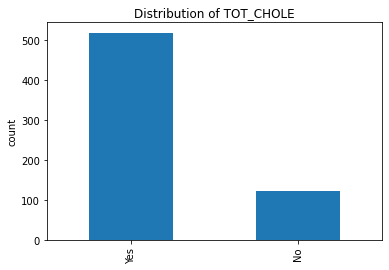

In [48]:
print(health['총콜레스테롤 정상여부'].value_counts())

health['총콜레스테롤 정상여부'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution of TOT_CHOLE')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54792 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_

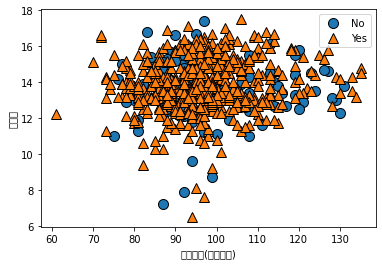

In [49]:
mglearn.discrete_scatter(health['식전혈당(공복혈당)'], health['혈색소'], health['총콜레스테롤 정상여부'])
plt.xlabel("식전혈당(공복혈당)")
plt.ylabel("혈색소")
plt.legend()
plt.show()

#의사결정나무(Decision tree) 모델

In [50]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 21 to 9965
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         641 non-null    int64  
 1   연령대코드(5세단위)  641 non-null    int64  
 2   신장(5Cm단위)    641 non-null    int64  
 3   체중(5Kg 단위)   641 non-null    int64  
 4   허리둘레         641 non-null    float64
 5   청력(좌)        641 non-null    int64  
 6   청력(우)        641 non-null    int64  
 7   수축기혈압        641 non-null    float64
 8   이완기혈압        641 non-null    float64
 9   식전혈당(공복혈당)   641 non-null    float64
 10  트리글리세라이드     641 non-null    float64
 11  HDL콜레스테롤     641 non-null    float64
 12  LDL콜레스테롤     641 non-null    float64
 13  혈색소          641 non-null    float64
 14  요단백          641 non-null    float64
 15  혈청크레아티닌      641 non-null    float64
 16  (혈청지오티)AST   641 non-null    float64
 17  (혈청지오티)ALT   641 non-null    float64
 18  감마지티피        641 non-null    float64
 19  흡연상태  

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = health[health.columns[2:21]] 
y = health[["총콜레스테롤 정상여부"]]   # target 변수 diagnosis 

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 21 to 9965
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   641 non-null    int64  
 1   체중(5Kg 단위)  641 non-null    int64  
 2   허리둘레        641 non-null    float64
 3   청력(좌)       641 non-null    int64  
 4   청력(우)       641 non-null    int64  
 5   수축기혈압       641 non-null    float64
 6   이완기혈압       641 non-null    float64
 7   식전혈당(공복혈당)  641 non-null    float64
 8   트리글리세라이드    641 non-null    float64
 9   HDL콜레스테롤    641 non-null    float64
 10  LDL콜레스테롤    641 non-null    float64
 11  혈색소         641 non-null    float64
 12  요단백         641 non-null    float64
 13  혈청크레아티닌     641 non-null    float64
 14  (혈청지오티)AST  641 non-null    float64
 15  (혈청지오티)ALT  641 non-null    float64
 16  감마지티피       641 non-null    float64
 17  흡연상태        641 non-null    int64  
 18  음주여부        641 non-null    int64  
dtypes: float64(13), int64(6)
me

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify=y, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.901


In [55]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.967
시험용 데이터 정확도: 0.919


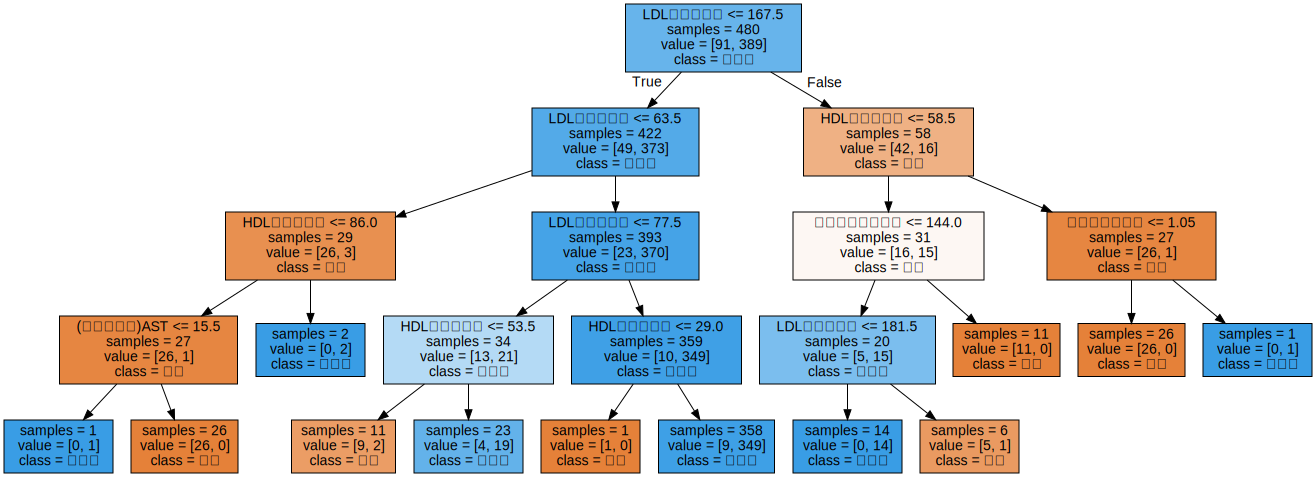

In [56]:
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "정상", "비정상"],
                feature_names=X.columns[ :20], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [57]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.0674312  0.14602006 0.75401628 0.
 0.         0.01626623 0.01626623 0.         0.         0.
 0.        ]


###중요 변수들

In [58]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.0674312  0.14602006 0.75401628 0.
 0.         0.01626623 0.01626623 0.         0.         0.
 0.        ]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_

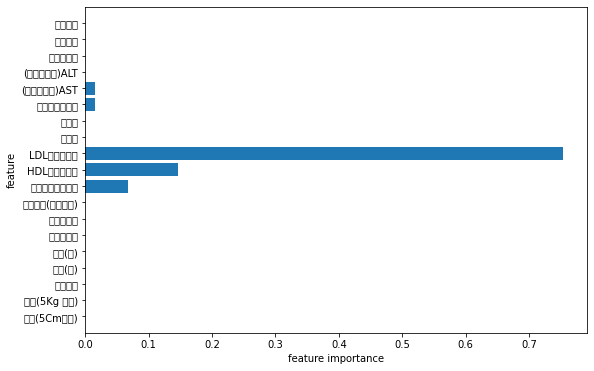

In [59]:
import numpy as np

def plot_feature_importances_X(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns[ :20])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns[ :20])   
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 

plot_feature_importances_X(tree)

In [60]:
res = pd.DataFrame(result) #데이터프레임 형식으로 만들기
res["name"] = X.columns[ :20]
display(res.info())

# perimeter_worst의 비중이 가장 큼, 루트 노드에서 이 값부터 사용 
display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19 non-null     float64
 1   name    19 non-null     object 
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


None

,0,name
15,0.000000,(혈청지오티)ALT
14,0.016266,(혈청지오티)AST
9,0.146020,HDL콜레스테롤
10,0.754016,LDL콜레스테롤
16,0.000000,감마지티피
5,0.000000,수축기혈압
7,0.000000,식전혈당(공복혈당)
0,0.000000,신장(5Cm단위)
12,0.000000,요단백
18,0.000000,음주여부


##앙상블모델

###랜덤포레스트

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


IndexError: ignored

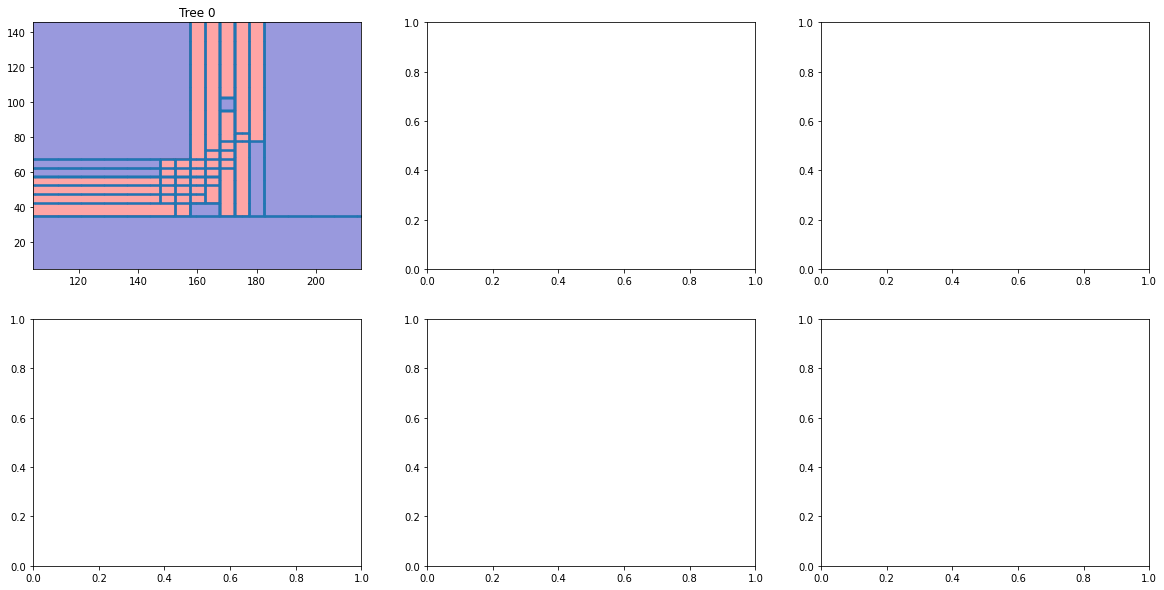

In [61]:
from sklearn.ensemble import RandomForestClassifier

# radius_mean, texture_mean 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용 - 여기서는 설명 생략
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [62]:
forest = RandomForestClassifier(n_estimators=100, random_state=0) #100번 돌림
forest.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(random_state=0)

In [63]:

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.907


###그래디언트 부스팅

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [65]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.932


In [66]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.981
시험용 데이터 세트 정확도: 0.913


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


학습 데이터 세트 정확도: 0.935
시험용 데이터 세트 정확도: 0.863


#분류모델평가

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy
Decision tree:  [0.8125     0.875      0.89583333 0.875      0.8125     0.91666667
 0.89583333 0.83333333 0.91666667 0.85416667]
Random forest:  [0.9375     0.89583333 0.9375     0.9375     0.85416667 0.97916667
 0.83333333 0.91666667 0.91666667 0.91666667]
Gradient boosting:  [0.95833333 0.89583333 0.9375     0.9375     0.89583333 0.95833333
 0.875      0.89583333 0.91666667 0.91666667]
Accuracy mean
Decision tree :0.869
Random forest :0.912
Gradient boosting :0.919


In [70]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10) #cv=10과 같음

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy mean -- StratifiedKFold 이용
Decision tree :0.869
Random forest :0.912
Gradient boosting :0.919


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#인사이트 도출

의사결정 나무를 통해 알아본 중요변수로는 HDL콜레스테롤과 LDL콜레스테롤, 트리글리세라이드가 있고, 가장 중요한 변수로는 LDL콜레스테롤임을 파악할 수 있다. 

교차검증을 통해 분류모델을 평가한 결과,Decision tree :0.869, Random forest :0.912, Gradient boosting :0.919의 정확도를 나타내는 것을 알 수 있다. 결과적으로 가장 정확도가 높은 모델은 0.919의 정확도를 보이는 그래디언트 부스팅임을 알 수 있다.



